## Initial Data Exploration Kuzushiji

Once you've identified a Use Case and Data Set it is time to get familiar with data. In the process model this task is called Initial Data Exploration. Please take a minute or two to (re)visit the following lecture

https://www.coursera.org/learn/data-science-methodology

Module 2 - Data Understanding

Please also revisit:

http://coursera.org/learn/ds

Module 3 - Mathematical Foundations and Module 4 - Visualizations

Given the lectures above, please create statistics and visualization on your Data Set to identify good columns for modeling, potential data quality issues and anticipate potential feature transformations necessary.

Create a jupyter notebook where you document your code and include visualizations as first deliverable. Please also stick to the naming conventions explained in the the process model manual.

So, the most important reasons / steps are:

Identify quality issues (e.g. missing values, wrong measurements, …)

Assess feature quality – how relevant is a certain measurement (e.g. use correlation matrix)

Get an idea on the value distribution of your data using statistical measures and visualizations

In [1]:
# install backend tensorflow
!pip install tensorflow==1.14.0

# install a certain version of seaborn needed later
!pip install seaborn==0.11.1
import seaborn as sns

# restart the kernel after running this cell

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [2]:
import tensorflow as tf

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-pack

In [3]:
tf.__version__

'1.14.0'

In [4]:
sns.__version__

'0.11.1'

In [5]:
!pip install python-mnist

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [6]:
from mnist import MNIST

In [7]:
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz?raw=True
!mv train-images-idx3-ubyte.gz?raw=True train-images-idx3-ubyte.gz

--2021-05-22 00:49:04--  http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz?raw=True
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18165135 (17M)
Saving to: ‘train-images-idx3-ubyte.gz?raw=True’

train-images-idx3-u 100%[===================>]  17.32M  5.19MB/s    in 4.0s    

2021-05-22 00:49:09 (4.36 MB/s) - ‘train-images-idx3-ubyte.gz?raw=True’ saved [18165135/18165135]



In [8]:
!gunzip train-images-idx3-ubyte.gz
!ls -lahr train-images-idx3-ubyte

gzip: train-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? ^C
-rw-rw---- 1 wsuser watsonstudio 45M Feb  4  2019 train-images-idx3-ubyte


In [9]:
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz?raw=True
!mv train-labels-idx1-ubyte.gz?raw=True train-labels-idx1-ubyte.gz
!gunzip train-labels-idx1-ubyte.gz
!ls -lahr train-labels-idx1-ubyte

--2021-05-22 00:53:05--  http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz?raw=True
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29497 (29K)
Saving to: ‘train-labels-idx1-ubyte.gz?raw=True’

train-labels-idx1-u 100%[===================>]  28.81K  --.-KB/s    in 0.1s    

2021-05-22 00:53:05 (207 KB/s) - ‘train-labels-idx1-ubyte.gz?raw=True’ saved [29497/29497]

gzip: train-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? ^C
-rw-rw---- 1 wsuser watsonstudio 59K Feb  4  2019 train-labels-idx1-ubyte


In [10]:
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-images-idx3-ubyte.gz?raw=True
!mv t10k-images-idx3-ubyte.gz?raw=True t10k-images-idx3-ubyte.gz
!gunzip t10k-images-idx3-ubyte.gz
!ls -lahr t10k-images-idx3-ubyte

--2021-05-22 00:53:16--  http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-images-idx3-ubyte.gz?raw=True
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3041136 (2.9M)
Saving to: ‘t10k-images-idx3-ubyte.gz?raw=True’

t10k-images-idx3-ub 100%[===================>]   2.90M  2.26MB/s    in 1.3s    

2021-05-22 00:53:17 (2.26 MB/s) - ‘t10k-images-idx3-ubyte.gz?raw=True’ saved [3041136/3041136]

gzip: t10k-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? ^C
-rw-rw---- 1 wsuser watsonstudio 7.5M Feb  4  2019 t10k-images-idx3-ubyte


In [11]:
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-labels-idx1-ubyte.gz?raw=True
!mv t10k-labels-idx1-ubyte.gz?raw=True t10k-labels-idx1-ubyte.gz
!gunzip t10k-labels-idx1-ubyte.gz
!ls -lahr t10k-labels-idx1-ubyte

--2021-05-22 00:53:25--  http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-labels-idx1-ubyte.gz?raw=True
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5120 (5.0K)
Saving to: ‘t10k-labels-idx1-ubyte.gz?raw=True’

t10k-labels-idx1-ub 100%[===================>]   5.00K  --.-KB/s    in 0s      

2021-05-22 00:53:25 (211 MB/s) - ‘t10k-labels-idx1-ubyte.gz?raw=True’ saved [5120/5120]

gzip: t10k-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? ^C
-rw-rw---- 1 wsuser watsonstudio 9.8K Feb  4  2019 t10k-labels-idx1-ubyte


In [12]:
import pandas as pd
url = "http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist_classmap.csv"
df_classmap = pd.read_csv(url)
df_classmap.head(11)

,index,codepoint,char
0,0,U+304A,お
1,1,U+304D,き
2,2,U+3059,す
3,3,U+3064,つ
4,4,U+306A,な
5,5,U+306F,は
6,6,U+307E,ま
7,7,U+3084,や
8,8,U+308C,れ
9,9,U+3092,を


In [13]:
# let's add the sound the character makes for non-Japanese speakers

phonetic = ['o','ki','su','tsu','na','ha','ma','ya','re','wo']
df_classmap['phonetic'] = phonetic
df_classmap

,index,codepoint,char,phonetic
0,0,U+304A,お,o
1,1,U+304D,き,ki
2,2,U+3059,す,su
3,3,U+3064,つ,tsu
4,4,U+306A,な,na
5,5,U+306F,は,ha
6,6,U+307E,ま,ma
7,7,U+3084,や,ya
8,8,U+308C,れ,re
9,9,U+3092,を,wo


In [14]:
!mkdir kmnistdata

mkdir: cannot create directory ‘datadir’: File exists


In [15]:
!ls -al

total 74436
drwxr-x--- 3 wsuser watsonstudio     4096 May 22 00:53 .
drwx------ 1 wsuser watsonstudio     4096 May 22 00:06 ..
drwxrwx--- 2 wsuser watsonstudio     4096 May 21 23:58 datadir
-rw-rw---- 1 wsuser watsonstudio  7840016 Feb  4  2019 t10k-images-idx3-ubyte
-rw-rw---- 1 wsuser watsonstudio  3041136 Feb  4  2019 t10k-images-idx3-ubyte.gz
-rw-rw---- 1 wsuser watsonstudio    10008 Feb  4  2019 t10k-labels-idx1-ubyte
-rw-rw---- 1 wsuser watsonstudio     5120 Feb  4  2019 t10k-labels-idx1-ubyte.gz
-rw-rw---- 1 wsuser watsonstudio 47040016 Feb  4  2019 train-images-idx3-ubyte
-rw-rw---- 1 wsuser watsonstudio 18165135 Feb  4  2019 train-images-idx3-ubyte.gz
-rw-rw---- 1 wsuser watsonstudio    60008 Feb  4  2019 train-labels-idx1-ubyte
-rw-rw---- 1 wsuser watsonstudio    29497 Feb  4  2019 train-labels-idx1-ubyte.gz


In [16]:
!cp t10k-images-idx3-ubyte kmnistdata/t10k-images-idx3-ubyte
!cp t10k-labels-idx1-ubyte kmnistdata/t10k-labels-idx1-ubyte
!cp train-images-idx3-ubyte kmnistdata/train-images-idx3-ubyte
!cp train-labels-idx1-ubyte kmnistdata/train-labels-idx1-ubyte

In [17]:
data = MNIST('kmnistdata')
train_images, train_labels = data.load_training()
test_images, test_labels = data.load_testing()

In [18]:
print(train_labels[0])
print(train_images[0])

8
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 118, 255, 255, 124, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 238, 255, 146, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 203, 255, 220, 14, 0, 0, 0, 11, 132, 95, 187, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 149, 255, 251, 66, 0, 0, 0, 7, 168, 136, 10, 223, 245, 67, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 247, 255, 156, 1, 0, 0, 0, 130, 201, 9, 0, 158, 255, 170, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 212, 255, 226, 22, 0, 0, 0, 79, 240, 38, 0, 0, 143, 255, 197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 148, 255, 255, 107, 0, 0, 0, 33, 237, 121, 0, 0, 0, 144, 255, 222, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 205, 255, 178, 3, 0, 0, 1, 179, 208, 5, 0, 0, 0, 126, 255, 166, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 245, 255, 76, 0, 0, 0, 124, 254, 108, 0, 0, 0, 0, 91, 255, 156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 255, 239, 12, 0, 0, 62, 250, 225, 8, 0, 0, 0, 0, 78, 255, 197, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
# We can actually see vaguely the shape of the character re, which 
# is labeled number 8

In [20]:
print(train_labels[1])
print(train_images[1])

7
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 134, 162, 155, 49, 0, 63, 89, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 120, 253, 250, 129, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 77, 252, 251, 78, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 107, 210, 241, 121, 133, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 147, 254, 244, 235, 230, 255, 138, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 82,

In [21]:
print(train_labels[:3])
print(train_images[:3])

array('B', [8, 7, 0])
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 118, 255, 255, 124, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 238, 255, 146, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 203, 255, 220, 14, 0, 0, 0, 11, 132, 95, 187, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 149, 255, 251, 66, 0, 0, 0, 7, 168, 136, 10, 223, 245, 67, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 247, 255, 156, 1, 0, 0, 0, 130, 201, 9, 0, 158, 255, 170, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 212, 255, 226, 22, 0, 0, 0, 79, 240, 38, 0, 0, 143, 255, 197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 148, 255, 255, 107, 0, 0, 0, 33, 237, 121, 0, 0, 0, 144, 255, 222, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 205, 255, 178, 3, 0, 0, 1, 179, 208, 5, 0, 0, 0, 126, 255, 166, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 245, 255, 76, 0, 0, 0, 124, 254, 108, 0, 0, 0, 0, 91, 255, 156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 255, 239, 12, 0, 0, 62, 250, 225, 8, 0, 0, 0, 0, 78, 255, 197, 0,

In [22]:
# the output means that train_labels is an array of typecode 'B'
# which is Python type int, and is C Type unsigned char

In [23]:
type(train_labels)

array.array

In [24]:
type(train_images)

list

In [25]:
train_labels.typecode

'B'

In [26]:
# this output is (address, length) giving current memory address
# and length in elements of the buffer used to hold the array's
# contents

train_labels.buffer_info()

(94445487059424, 60000)

In [27]:
# need to move this code to another notebook
# not the data exploration notebook
# train_images = train_images / 255
# test_images = test_images / 255

In [28]:
# In the first dataset that we downloaded and loaded above, the data
# is already flattened, which is good for the machine learning model
# but we would like to actaully be able to view the images

# so, the first step here is the convert the data into numpy arrays
# numpy arrays can be used to normalize for the ML model, but also
# numpy arrays are easier to reshape in case we want to actually view 
# the data as images

In [29]:
import numpy as np

In [30]:
train_images = np.array(train_images)

In [31]:
train_labels = np.array(train_labels)

In [32]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [33]:
# now we should be able to do more with the data in terms of data exploration

In [34]:
train_images.shape

(60000, 784)

In [35]:
# we need to unflatten the data if we want to view and verify that these are actually images of
# kuzushiji characters

train_images = np.reshape(train_images, (60000, 28, 28))

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

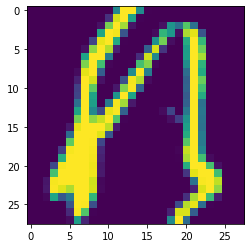

In [37]:
plt.figure()
plt.imshow(train_images[0])
plt.show()

In [38]:
# so we can see, using the classmap that this character is the character 're', which is index 8
df_classmap.head(11)

,index,codepoint,char,phonetic
0,0,U+304A,お,o
1,1,U+304D,き,ki
2,2,U+3059,す,su
3,3,U+3064,つ,tsu
4,4,U+306A,な,na
5,5,U+306F,は,ha
6,6,U+307E,ま,ma
7,7,U+3084,や,ya
8,8,U+308C,れ,re
9,9,U+3092,を,wo


In [39]:
# so this label should be 8:
train_labels[0]

8

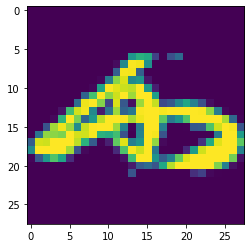

In [40]:
# we can check a few more
plt.figure()
plt.imshow(train_images[1])
plt.show()

In [41]:
# I can't tell what that one is.  Let's check the label:
train_labels[1]

7

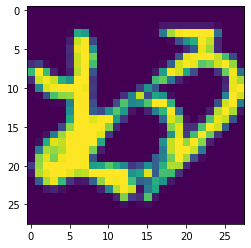

In [42]:
# it is 'ya'
# Next:

plt.figure()
plt.imshow(train_images[2])
plt.show()

In [43]:
train_labels[2]

0

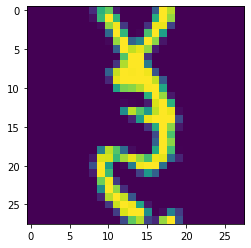

In [44]:
# that one is "o"
plt.figure()
plt.imshow(train_images[3])
plt.show()

In [45]:
train_labels[3]

1

8
れ re


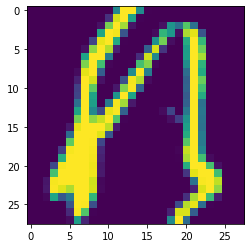

7
や ya


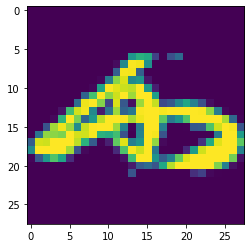

0
お o


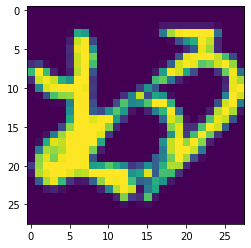

1
き ki


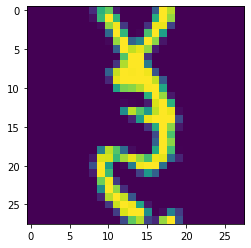

4
な na


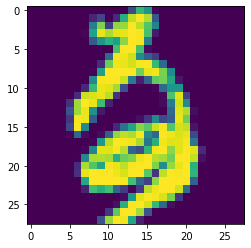

2
す su


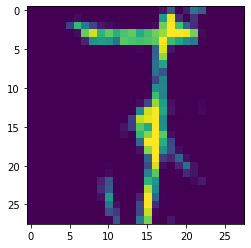

4
な na


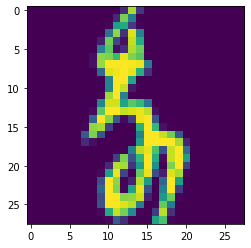

8
れ re


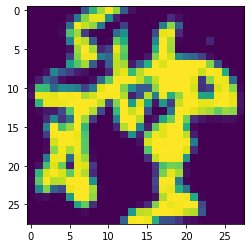

1
き ki


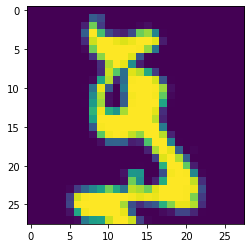

1
き ki


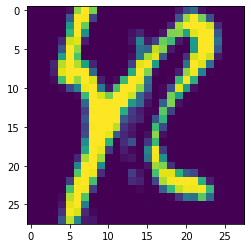

5
は ha


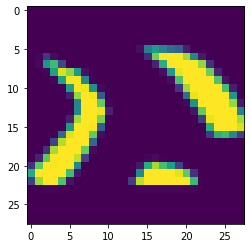

1
き ki


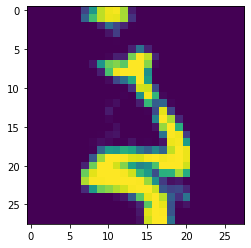

0
お o


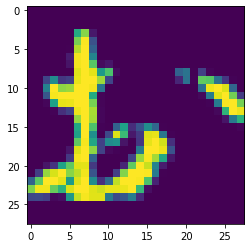

5
は ha


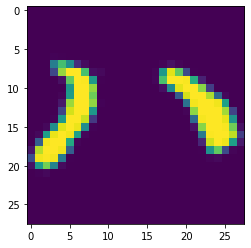

7
や ya


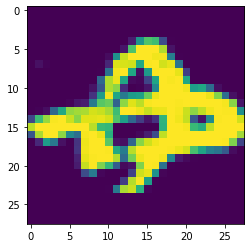

6
ま ma


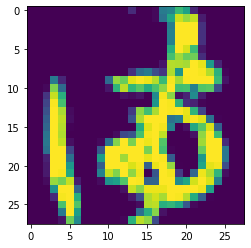

1
き ki


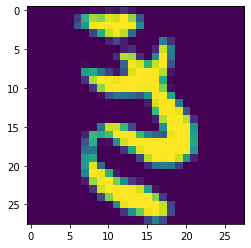

7
や ya


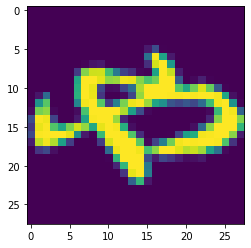

9
を wo


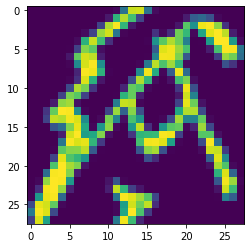

5
は ha


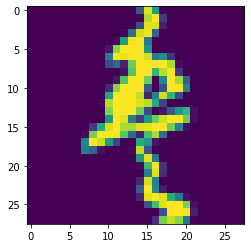

7
や ya


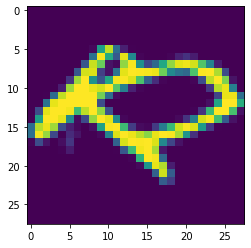

3
つ tsu


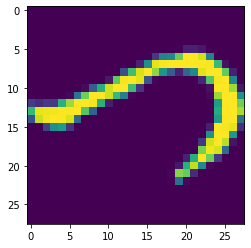

7
や ya


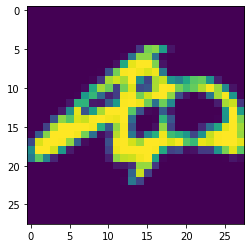

5
は ha


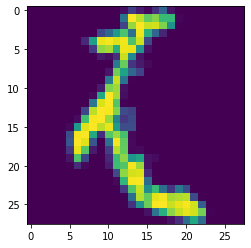

6
ま ma


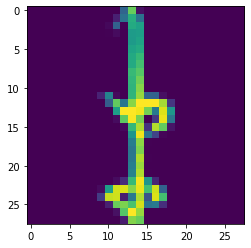

6
ま ma


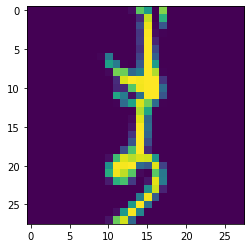

2
す su


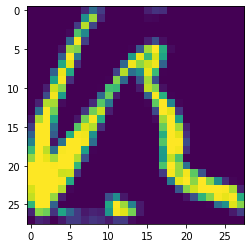

7
や ya


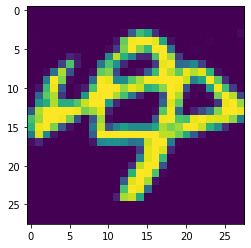

6
ま ma


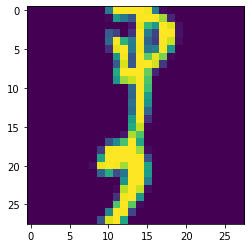

0
お o


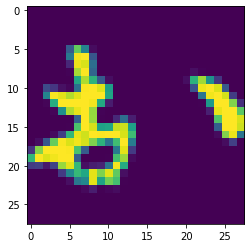

9
を wo


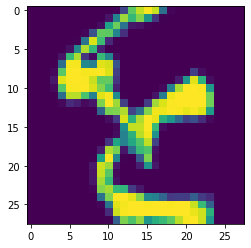

6
ま ma


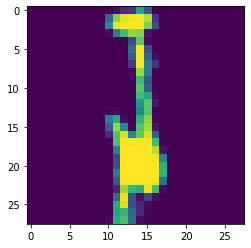

1
き ki


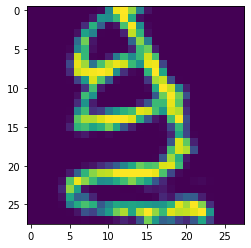

5
は ha


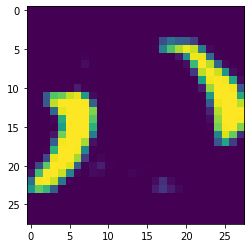

9
を wo


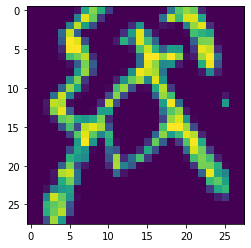

5
は ha


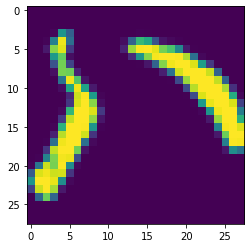

8
れ re


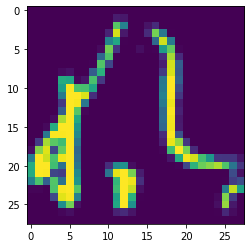

0
お o


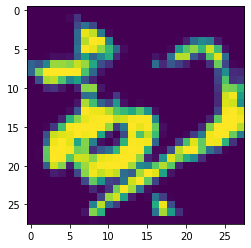

0
お o


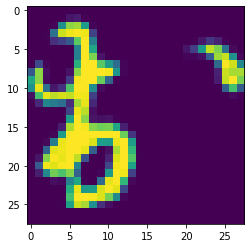

8
れ re


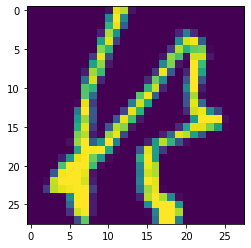

In [46]:
for i in range(0,40):
    print(train_labels[i])
    print(df_classmap.loc[train_labels[i],'char'], df_classmap.loc[train_labels[i],'phonetic'])
    plt.figure()
    plt.imshow(train_images[i])
    plt.show()
    
    i+=1

In [47]:
# So we now we have verified this data is what we want: namely images of kuzushiji characters
# which we can view in "unflattned" format (60000, 28, 28) as images and that we can leave in "flattened" 
# format in two dimensional numpy arrays with dimensions (60000, 784) for use in the ML model

# next we convert the train_labels numpy array to a dataframe

df_train_labels = pd.DataFrame(train_labels)

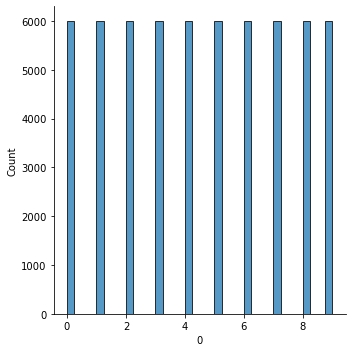

In [48]:
sns.displot(df_train_labels[0])

In [49]:
# so this is a balanced set

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


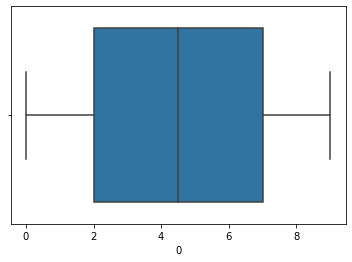

In [50]:
sns.boxplot(df_train_labels[0])

In [52]:
df_train_labels[0].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: 0, dtype: int64

In [53]:
df_train_labels.head(20)

,0
0,8
1,7
2,0
3,1
4,4
5,2
6,4
7,8
8,1
9,1


In [56]:
# next we want to obtain a slightly more difficult dataset, which includes 49 classes

!wget http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz?raw=True
!mv k49-train-imgs.npz?raw=True k49-train-imgs.npz
!ls -lahr k49-train-imgs.npz

--2021-05-22 01:08:40--  http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz?raw=True
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66117696 (63M)
Saving to: ‘k49-train-imgs.npz?raw=True’

k49-train-imgs.npz? 100%[===================>]  63.05M  14.0MB/s    in 6.9s    

2021-05-22 01:08:47 (9.16 MB/s) - ‘k49-train-imgs.npz?raw=True’ saved [66117696/66117696]

-rw-rw---- 1 wsuser watsonstudio 64M Feb  4  2019 k49-train-imgs.npz


In [59]:
k49_train_images = np.load('k49-train-imgs.npz')

In [61]:
!wget http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz?raw=True
!mv k49-train-labels.npz?raw=True k49-train-labels.npz
!ls -lahr k49-train-labels.npz
k49_train_labels = np.load('k49-train-labels.npz')

--2021-05-22 01:13:08--  http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz?raw=True
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164485 (161K)
Saving to: ‘k49-train-labels.npz?raw=True’

k49-train-labels.np 100%[===================>] 160.63K   375KB/s    in 0.4s    

2021-05-22 01:13:09 (375 KB/s) - ‘k49-train-labels.npz?raw=True’ saved [164485/164485]

-rw-rw---- 1 wsuser watsonstudio 161K Feb  4  2019 k49-train-labels.npz


In [62]:
!wget http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-imgs.npz?raw=True
!mv k49-test-imgs.npz?raw=True k49-test-imgs.npz
!ls -lahr k49-test-imgs.npz
k49_test_images = np.load('k49-test-imgs.npz')

--2021-05-22 01:13:37--  http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-imgs.npz?raw=True
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10971201 (10M)
Saving to: ‘k49-test-imgs.npz?raw=True’

k49-test-imgs.npz?r 100%[===================>]  10.46M  4.07MB/s    in 2.6s    

2021-05-22 01:13:40 (4.07 MB/s) - ‘k49-test-imgs.npz?raw=True’ saved [10971201/10971201]

-rw-rw---- 1 wsuser watsonstudio 11M Feb  4  2019 k49-test-imgs.npz


In [63]:
!wget http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-labels.npz?raw=True
!mv k49-test-labels.npz?raw=True k49-test-labels.npz
!ls -lahr k49-test-labels.npz
k49_test_labels = np.load('k49-test-labels.npz')

--2021-05-22 01:14:45--  http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-labels.npz?raw=True
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27450 (27K)
Saving to: ‘k49-test-labels.npz?raw=True’

k49-test-labels.npz 100%[===================>]  26.81K  --.-KB/s    in 0.1s    

2021-05-22 01:14:45 (189 KB/s) - ‘k49-test-labels.npz?raw=True’ saved [27450/27450]

-rw-rw---- 1 wsuser watsonstudio 27K Feb  4  2019 k49-test-labels.npz


In [65]:
url = "http://codh.rois.ac.jp/kmnist/dataset/k49/k49_classmap.csv"
df_k49_classmap = pd.read_csv(url)
df_k49_classmap.head(51)

,index,codepoint,char
0,0,U+3042,あ
1,1,U+3044,い
2,2,U+3046,う
3,3,U+3048,え
4,4,U+304A,お
5,5,U+304B,か
6,6,U+304D,き
7,7,U+304F,く
8,8,U+3051,け
9,9,U+3053,こ


In [72]:
# let's add the sound the character makes for non-Japanese speakers

k49_phonetic = ['a', 'i',  'u',  'e',  'o',\
                'ka','ki', 'ku', 'ke', 'ko',\
                'sa','shi','su', 'se', 'so',\
                'ta','chi','tsu','te', 'to',\
                'na','ni', 'nu', 'ne', 'no',\
                'ha','hi', 'fu', 'he', 'ho',\
                'ma','mi', 'mu', 'me', 'mo',\
                'ya','yu', 'yo',\
                'ra','ri', 'ru', 're', 'ro',\
                'wa','wi', 'we ','wo', 'n','iteration_mark']
print(len(k49_phonetic))
df_k49_classmap['phonetic'] = k49_phonetic
df_k49_classmap

49


,index,codepoint,char,phonetic
0,0,U+3042,あ,a
1,1,U+3044,い,i
2,2,U+3046,う,u
3,3,U+3048,え,e
4,4,U+304A,お,o
5,5,U+304B,か,ka
6,6,U+304D,き,ki
7,7,U+304F,く,ku
8,8,U+3051,け,ke
9,9,U+3053,こ,ko


In [75]:
type(k49_train_labels)

numpy.lib.npyio.NpzFile

In [77]:
type(k49_train_images)

numpy.lib.npyio.NpzFile

In [78]:
k49_train_images.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f236e501050>)

In [79]:
print(k49_train_images)

In [80]:
k49_train_img_list = k49_train_images.files

In [82]:
for item in k49_train_img_list:
    print(item)
    print(k49_train_images[item])

NameError: name 'k49_train_img_list' is not defined